# Spectral Features

Spectral features are a set of audio features that are derived from the spectral representation of an audio signal. The spectral representation of an audio signal is obtained by applying the Fourier transform to the signal over short time windows. This results in a time-varying representation of the signal in the frequency domain, where the power spectral density of the signal at different frequencies and time points is computed.

The time-varying representation of the signal in the frequency domain means that the signal is analyzed over time at different frequencies. When an audio signal is transformed into the frequency domain using the Fourier transform, it becomes possible to see how much of the signal's energy is present at each frequency component.

In this time-varying representation, the power spectral density of the signal is computed for different frequencies and time points. Power spectral density refers to the distribution of the signal's power across different frequencies. So, for each small time window, the power spectral density is computed for each frequency, resulting in a time-varying representation of the signal in the frequency domain.

This representation allows for the extraction of various spectral features, which can be used to characterize different properties of the audio signal. By analyzing the spectral features over time, it is possible to gain insights into how the frequency content of the signal changes over time and how different events in the audio signal are related to changes in the spectral content.

In [470]:
import librosa
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np

In [471]:
plt.style.use('dark_background')
# plt.style.use('Solarize_Light2')

In [472]:
def load_audio(audio_path):
    x, sr = librosa.load(audio_path)
    print(type(x), type(sr))
    print(x.shape, sr)

    return x, sr

In [473]:
base_path = './Data/genres_original'
file = 'reggae/reggae.00005.wav'
audio_path = f'{base_path}/{file}'
(y, sr) = load_audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


## Chroma

Chroma refers to a set of features that capture the pitch content and harmonic structure of an audio signal. It is often used in music analysis and music information retrieval tasks.

The chroma features represent the distribution of energy in different pitch classes or musical notes. They are derived from the spectrogram of the audio signal, which is a visual representation of the signal's frequency content over time. The spectrogram is typically computed using the Fourier transform.

To compute chroma features, the spectrogram is divided into a set of frequency bands that correspond to different musical notes or pitch classes. The energy in each frequency band is then summed up to obtain the chroma feature values. This process is often performed using a filter bank or a set of cosine functions that are tuned to the desired pitch classes.

Chroma features are useful for tasks such as music genre classification, chord recognition, melody extraction, and audio similarity analysis. They provide a compact representation of the tonal content of an audio signal and can be used to capture musical aspects such as chord progressions and melodic patterns.

### Chromagrams

Chromagrams are a type of visualization that represents the chroma features of an audio signal. They provide a way to visualize the pitch content and harmonic structure of music or sound.

To create a chromagram, the audio signal is first transformed into a spectrogram using the Fourier transform. The spectrogram represents the signal's frequency content over time.

Next, the spectrogram is divided into frequency bands that correspond to different musical notes or pitch classes. These pitch classes are typically represented by 12 semitones in Western music, corresponding to the 12 notes in an octave.

For each time frame in the spectrogram, the energy or intensity in each pitch class is computed by summing the energy across the corresponding frequency band. These energies are then mapped onto a color scale to generate the chromagram. Each column in the chromagram represents a specific time frame, and each row represents a pitch class.

The resulting chromagram provides a visual representation of the presence and distribution of different musical notes or pitch classes over time. It can be used for tasks such as music transcription, chord recognition, and melody analysis, allowing for a more intuitive and concise representation of the underlying tonal information in the audio signal.

## Short-Time Fourier Transform (STFT)

A feature that represents the distribution of pitch classes in an audio signal. It is computed from the short-time Fourier transform (STFT) and can be used for tasks such as music genre classification and chord recognition.

In [474]:
librosa.feature.chroma_stft(y=y, sr=sr)

array([[0.35166004, 0.28422588, 0.24786304, ..., 0.5592603 , 0.37255338,
        0.78601134],
       [0.688377  , 0.8210777 , 1.        , ..., 0.5851438 , 0.30033076,
        0.64760494],
       [1.        , 1.        , 0.8437313 , ..., 0.7478237 , 0.47217178,
        0.7563511 ],
       ...,
       [0.8913222 , 0.58592093, 0.39343765, ..., 0.30214497, 0.2695208 ,
        0.492628  ],
       [0.84476644, 0.49521217, 0.36946237, ..., 0.29371986, 0.19176272,
        0.3627578 ],
       [0.2942005 , 0.19752395, 0.17520203, ..., 0.38606405, 0.20034434,
        0.47595617]], dtype=float32)

### Use an energy (magnitude) spectrum instead of power spectrogram

Using an energy (magnitude) spectrum instead of a power spectrogram means that instead of computing the power spectral density of the signal, the magnitude of the Short-Time Fourier Transform (STFT) is used.

The STFT of an audio signal is obtained by computing the Fourier transform of short time windows of the signal. The resulting STFT consists of a time-varying complex-valued matrix whose magnitude is commonly used to represent the energy of the signal at each frequency and time point.

In the following code snippet, the STFT of the audio signal 'y' is first computed using the librosa.stft() function, and the magnitude of the STFT is obtained using np.abs() function. Then, the chroma feature is computed from the magnitude spectrogram using the librosa.feature.chroma_stft() function.

The chroma feature is a type of spectral feature that represents the pitch content of the audio signal. It is computed by mapping the STFT magnitude to a chromatic scale, which groups nearby frequencies into semitone bins. The resulting chroma feature is a time-varying matrix whose columns represent different pitch classes (e.g., C, C#, D, D#, etc.) and whose values represent the energy of the audio signal in each pitch class at each time point.

Using the magnitude spectrogram instead of the power spectrogram can be beneficial in cases where only the relative magnitudes of different frequency components matter, and the exact power levels are less important. This approach can be particularly useful in music information retrieval tasks such as genre classification, chord recognition, and melody extraction.

In [475]:
mel_spectrogram = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=mel_spectrogram, sr=sr)
chroma

array([[0.53401726, 0.44683033, 0.4762849 , ..., 1.        , 0.96944803,
        1.        ],
       [0.81095344, 0.8673055 , 1.        , ..., 0.82923687, 0.66784894,
        0.730963  ],
       [0.8939466 , 1.        , 0.98646885, ..., 0.7671196 , 0.74128073,
        0.69876546],
       ...,
       [0.9064403 , 0.7782171 , 0.7482533 , ..., 0.79530054, 0.6618843 ,
        0.7130978 ],
       [1.        , 0.85159045, 0.8512415 , ..., 0.81082565, 0.5449006 ,
        0.61104953],
       [0.600064  , 0.48774683, 0.48289582, ..., 0.90396106, 0.61699885,
        0.68860346]], dtype=float32)

Use a pre-computed power spectrogram with a larger frame

In [476]:
mel_spectrogram = np.abs(librosa.stft(y, n_fft=4096)) ** 2
chroma = librosa.feature.chroma_stft(S=mel_spectrogram, sr=sr)
chroma

array([[0.3437655 , 0.29820922, 0.25112718, ..., 0.5173068 , 0.52142656,
        0.43685916],
       [0.86834407, 1.        , 1.        , ..., 0.708154  , 0.5378942 ,
        0.19122979],
       [1.        , 0.83408046, 0.62090695, ..., 0.83584964, 0.6369374 ,
        0.31624207],
       ...,
       [0.6932554 , 0.35709026, 0.07001977, ..., 0.47259486, 0.3459339 ,
        0.24859168],
       [0.5847085 , 0.3518466 , 0.18775363, ..., 0.35956472, 0.2758803 ,
        0.23984511],
       [0.21126698, 0.16427538, 0.14277802, ..., 0.39302167, 0.3452336 ,
        0.30430454]], dtype=float32)

### Plot Chroma_stft

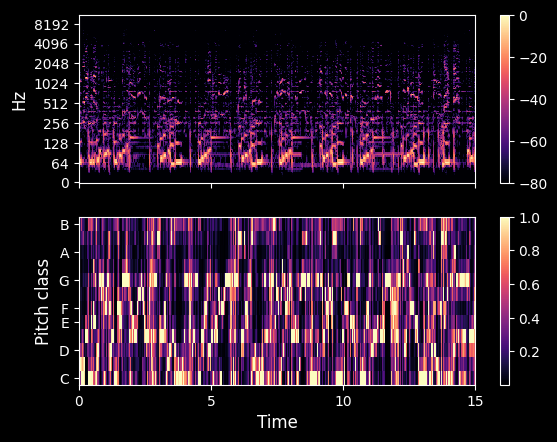

In [477]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(
    librosa.amplitude_to_db(mel_spectrogram, ref=np.max),
    y_axis='log',
    x_axis='time',
    ax=ax[0]
)
fig.colorbar(img, ax=[ax[0]])

ax[0].label_outer()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

## Constant-Q Transform (CQT)

Similar to chroma_stft, but computed using the constant-Q transform (CQT). It is more robust to tuning variations and can be used for music transcription.

In [478]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

### Constant-Q Transform (CQT) vs Short-Time Fourier Transform (STFT)

The Constant-Q Transform (CQT) and Short-Time Fourier Transform (STFT) are both time-frequency analysis techniques commonly used in audio signal processing. While they share some similarities, they also have distinct characteristics that make them suitable for different applications. Let's delve deeper into the differences between CQT and STFT and discuss when to use each one:

#### Frequency Resolution:

*STFT*: The STFT provides a fixed frequency resolution throughout the entire spectrum. It divides the signal into overlapping frames and computes the Fourier Transform on each frame. As a result, the frequency resolution is constant across the entire frequency range.

*CQT*: The CQT offers a logarithmically spaced frequency resolution. It achieves this by dividing the signal into frames of varying width, with narrower frames at higher frequencies and wider frames at lower frequencies. This logarithmic spacing provides a more perceptually accurate representation of pitch perception and better aligns with the human auditory system.

#### Time-Frequency Trade-off:

*STFT*: The STFT provides good temporal resolution, meaning it can capture rapid changes in the signal over time. However, its frequency resolution is limited, especially for low frequencies. This trade-off makes the STFT well-suited for analyzing transient events or detecting short-term spectral changes.

*CQT*: The CQT sacrifices some temporal resolution to achieve better frequency resolution, particularly in the low-frequency range. It is suitable for tasks that require more accurate pitch estimation and harmonic analysis, where the temporal details are less important than the spectral characteristics.
Musical Pitch Analysis:

*STFT*: The STFT is often used for tasks that involve analyzing and processing audio signals in the context of musical pitch. It can capture the harmonic content of the signal, but its fixed frequency resolution may result in less accurate pitch estimation, especially for complex musical signals.

*CQT*: The CQT is particularly useful for tasks that require precise pitch analysis, such as melody extraction, chord recognition, or pitch tracking. Its logarithmic frequency resolution better aligns with the musical pitch scale, allowing for more accurate estimation of pitch and harmonic relationships.

#### Spectrogram Visualization:

*STFT*: The STFT spectrogram is commonly used for visualizing the spectral content of audio signals over time. It provides a straightforward representation where each pixel represents the magnitude of a specific frequency component at a particular time.

*CQT*: The CQT spectrogram offers a logarithmic frequency axis, which can be useful for visualizing pitch-related features. It can reveal the harmonic structure and tonal characteristics of the signal more intuitively than the linearly spaced frequency axis of the STFT spectrogram.

In summary, the choice between CQT and STFT depends on the specific application and the trade-off between temporal and frequency resolution. If accurate pitch analysis and harmonic information are crucial, the CQT is generally preferred. On the other hand, if capturing rapid temporal changes or processing transient events is the main objective, the STFT is a suitable choice.

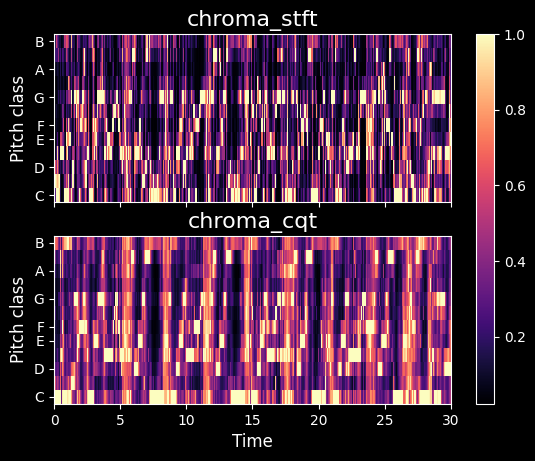

In [479]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()

img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

## Chroma Energy Normalized (CENS)

A variant of chroma_stft that is computed using a constant energy normalization scheme (CENS). It is more robust to variations in tempo and dynamics and can be used for music recommendation and retrieval.

In [480]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

### Chroma Energy Normalized (CENS) vs Constant-Q Transform (CQT)

Chroma Energy Normalized (CENS) and Constant-Q Transform (CQT) are two different audio signal processing techniques commonly used in music analysis and audio feature extraction. While they serve similar purposes, there are distinct differences between them. Let's explore these differences and discuss when one might be preferred over the other.

#### Chroma Energy Normalized (CENS):
CENS is a method that computes a chroma-based representation of audio signals. It involves the following steps:
1. Convert the audio signal to the frequency domain using a Fast Fourier Transform (FFT).
2. Calculate the chroma features by mapping the frequencies to the nearest pitch classes.
3. Apply energy normalization to make the features more robust to variations in loudness and instrumentation.
4. CENS is particularly useful in music analysis tasks where the emphasis is on capturing the harmonic content and overall musical structure. By normalizing the energy, CENS can provide more stable representations that are less affected by volume variations.

#### Constant-Q Transform (CQT):
The CQT is a frequency analysis technique that aims to provide a more perceptually accurate representation of audio signals compared to the traditional FFT-based methods. It is characterized by the following features:
1. The CQT uses a logarithmic frequency spacing to mimic the human auditory system's response to pitch perception.
2. Unlike the FFT, which uses a fixed window size for all frequencies, the CQT employs different window sizes for different frequencies to achieve a constant ratio of frequency resolution across the spectrum.
3. The CQT is beneficial when the analysis requires a more detailed representation of audio signals, especially for tasks involving pitch detection, melody extraction, or audio synthesis. Due to its logarithmic frequency spacing and improved resolution at low frequencies, it is particularly suitable for capturing tonal information in music signals.

#### When to use CENS or CQT:
The choice between CENS and CQT depends on the specific analysis goals and requirements. Here are some considerations:

CENS is generally more suitable when the focus is on capturing the overall harmonic structure and similarity between musical pieces. It can be useful for tasks like music genre classification, chord recognition, or music similarity comparison.

CQT is preferred when a more accurate representation of the audio signals' tonal content is needed. It is commonly used for tasks like pitch tracking, melody extraction, audio synthesis, or any analysis that requires precise frequency localization.

In summary, CENS is advantageous for capturing harmonic content and robustness to volume variations, while CQT provides a more perceptually accurate representation with improved frequency resolution. The choice between the two depends on the specific analysis objectives and the level of detail required for the task at hand.

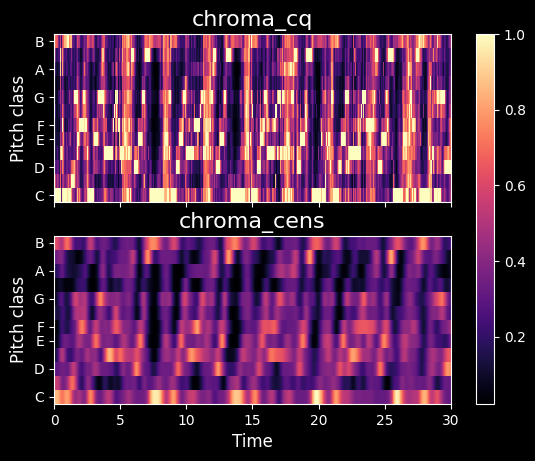

In [481]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()

librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

## Variable-Q Chromagram

A variant of chroma_cqt that is computed using a variable-Q transform (VQT). It is more suitable for analyzing non-stationary signals, such as speech and environmental sounds.

In [482]:
n_bins = 36
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=n_bins)
chroma_vq = librosa.feature.chroma_vqt(y=y, sr=sr, intervals='ji5', bins_per_octave=n_bins)

### Variable-Q Chromagram and Constant-Q Transform (CQT)

The Variable-Q Chromagram and Constant-Q Transform (CQT) are both techniques used in audio signal processing, specifically for analyzing the spectral content of audio signals. While they share some similarities, there are key differences between them.

1. Frequency Resolution:
   - Variable-Q Chromagram: It uses a fixed time resolution and variable frequency resolution. This means that the frequency resolution varies across different frequency regions. It provides higher frequency resolution for lower frequencies and lower frequency resolution for higher frequencies.
   - CQT: It uses a constant frequency resolution and variable time resolution. This means that the frequency resolution remains constant across different frequency regions. It provides consistent frequency resolution throughout the entire frequency range.

2. Q-Factor:
   - Variable-Q Chromagram: The Q-factor (also known as the quality factor or bandwidth factor) can vary for each frequency bin. The Q-factor determines the width of each frequency bin.
   - CQT: The Q-factor is fixed and constant across all frequency bins. This ensures that the frequency resolution remains consistent throughout the analysis.

3. Applications:
   - Variable-Q Chromagram: It is commonly used in music information retrieval tasks such as chord recognition, key estimation, and music similarity analysis. The variable frequency resolution can be beneficial for capturing fine-grained details in music signals.
   - CQT: It is often used in tasks that require accurate pitch estimation, such as melody extraction and audio-to-MIDI conversion. The constant frequency resolution allows for precise identification of individual pitch components.

Choosing between Variable-Q Chromagram and CQT depends on the specific requirements of your audio analysis task. Consider the following factors:

- If you need consistent frequency resolution throughout the entire frequency range, and accurate pitch estimation is crucial, CQT is a better choice.
- If you require high frequency resolution for lower frequencies and lower frequency resolution for higher frequencies, and you are focusing on music information retrieval tasks, Variable-Q Chromagram may be more suitable.

It's worth noting that both techniques have their strengths and limitations, and the choice may also depend on the characteristics of the audio signals you are working with and the specific goals of your analysis.

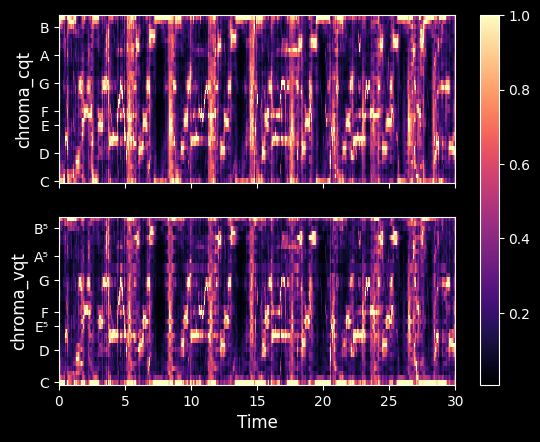

In [483]:
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(
    chroma_cq,
    y_axis='chroma',
    x_axis='time',
    ax=ax[0],
    bins_per_octave=n_bins
)

ax[0].set(ylabel='chroma_cqt')
ax[0].label_outer()
img = librosa.display.specshow(
    chroma_vq,
    y_axis='chroma_fjs',
    x_axis='time',
    ax=ax[1],
    bins_per_octave=n_bins,
    intervals='ji5'
)

ax[1].set(ylabel='chroma_vqt')
fig.colorbar(img, ax=ax)

## Melspectrogram

A feature that represents the power spectral density of an audio signal in the mel-scale. It is computed using a bank of mel filters and can be used for speech recognition, speaker identification, and music genre classification.

In [484]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[8.23457909e+00, 2.75434995e+00, 5.25314212e-01, ...,
        3.69490552e+00, 3.35993600e+00, 1.68958104e+00],
       [7.79759521e+01, 1.76643066e+02, 1.98131134e+02, ...,
        1.08242882e+02, 2.15604210e+01, 4.97887468e+00],
       [8.20006561e+01, 1.89579605e+02, 2.03072540e+02, ...,
        3.21736603e+02, 4.44951973e+01, 1.30579987e+01],
       ...,
       [1.34694186e-04, 3.70132766e-05, 2.74909121e-06, ...,
        7.28950113e-07, 4.99077714e-07, 2.13573203e-05],
       [1.14328315e-04, 2.81720277e-05, 1.43443387e-07, ...,
        6.31860004e-08, 3.95949286e-07, 2.03930067e-05],
       [1.09244284e-04, 2.68275817e-05, 1.45211647e-08, ...,
        1.09159242e-08, 3.79143160e-07, 1.98812268e-05]], dtype=float32)

### Using a pre-computed power spectrogram would give the same result:

In [485]:
S = np.abs(librosa.stft(y)) ** 2
mel_spectrogram = librosa.feature.melspectrogram(S=S, sr=sr)
mel_spectrogram

array([[8.23457909e+00, 2.75434995e+00, 5.25314212e-01, ...,
        3.69490552e+00, 3.35993600e+00, 1.68958104e+00],
       [7.79759521e+01, 1.76643066e+02, 1.98131134e+02, ...,
        1.08242882e+02, 2.15604210e+01, 4.97887468e+00],
       [8.20006561e+01, 1.89579605e+02, 2.03072540e+02, ...,
        3.21736603e+02, 4.44951973e+01, 1.30579987e+01],
       ...,
       [1.34694186e-04, 3.70132766e-05, 2.74909121e-06, ...,
        7.28950113e-07, 4.99077714e-07, 2.13573203e-05],
       [1.14328315e-04, 2.81720277e-05, 1.43443387e-07, ...,
        6.31860004e-08, 3.95949286e-07, 2.03930067e-05],
       [1.09244284e-04, 2.68275817e-05, 1.45211647e-08, ...,
        1.09159242e-08, 3.79143160e-07, 1.98812268e-05]], dtype=float32)

### Display of mel-frequency spectrogram coefficients, with custom arguments for mel filterbank construction (default is fmax=sr/2):

A mel-frequency spectrogram is a representation of an audio signal in which the frequency axis is divided into mel-scale bins. The mel scale is a perceptual scale of pitches that approximates the human ear's response to different frequencies.

In the code, the librosa.feature.melspectrogram() function is used to compute the mel spectrogram coefficients. Here's a breakdown of the function arguments:

y: The audio signal. This is the input audio waveform.
sr: The sampling rate of the audio signal, which specifies the number of samples per second. It indicates the resolution of the audio signal.
n_mels: The number of mel bins to generate. In this case, it is set to 128, which means the frequency axis will be divided into 128 mel-scale bins.
fmax: The maximum frequency to include in the mel spectrogram. By default (fmax=sr/2), it is set to half of the sampling rate, which is commonly used to avoid aliasing. However, in this code, it is set explicitly to 8000, which means only frequencies up to 8000 Hz will be included in the mel spectrogram.

The output of this code is the mel-frequency spectrogram coefficients stored in the variable S. These coefficients represent the energy distribution in each mel bin over time, providing a compact representation of the audio signal's spectral content.

In [486]:
# Passing through arguments to the Mel filters
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                                 fmax=8000)
mel_spectrogram

array([[6.60424519e+00, 2.44196105e+00, 4.44108665e-01, ...,
        2.22848558e+00, 2.08573008e+00, 1.45427048e+00],
       [5.85866699e+01, 1.12118652e+02, 1.21048080e+02, ...,
        6.81071472e+01, 1.90451603e+01, 3.56912589e+00],
       [1.04414764e+02, 2.70604340e+02, 3.05053467e+02, ...,
        2.98459137e+02, 3.75544167e+01, 1.29843044e+01],
       ...,
       [1.15830395e-02, 1.23219751e-02, 5.83219435e-03, ...,
        7.41364341e-03, 2.88699754e-04, 1.74905319e-04],
       [7.26766558e-03, 6.13760529e-03, 4.29392280e-03, ...,
        1.53967971e-02, 5.74021484e-04, 1.88538470e-04],
       [1.66533720e-02, 1.74812637e-02, 1.08623253e-02, ...,
        6.33685105e-03, 5.72641671e-04, 3.01502645e-04]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

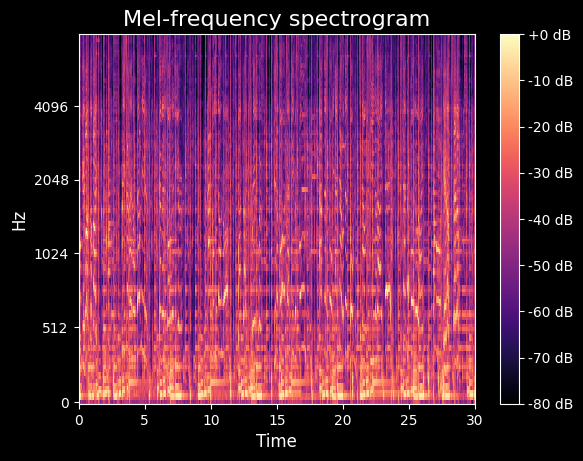

In [487]:
fig, ax = plt.subplots()
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
img = librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## MFCC

Mel-frequency cepstral coefficients are a feature that represents the spectral envelope of an audio signal. They are computed by taking the logarithm of the mel-spectrum and applying a discrete cosine transform (DCT). They are commonly used for speech recognition and speaker identification.

In [488]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc

array([[-6.83552094e+01, -6.18175507e+01, -8.35769501e+01, ...,
        -1.17138847e+02, -2.27452179e+02, -2.67072388e+02],
       [ 1.24693344e+02,  1.26948944e+02,  1.24687935e+02, ...,
         1.08339363e+02,  1.16069557e+02,  1.20033920e+02],
       [-2.37799454e+01, -3.09625969e+01, -2.97795486e+01, ...,
        -4.06066399e+01, -2.02662163e+01, -1.07091081e+00],
       ...,
       [ 2.14622078e+01,  2.15951939e+01,  1.82780075e+01, ...,
         4.27757835e+00,  9.66378093e-01, -1.88640261e+00],
       [ 1.43677216e+01,  1.10493355e+01,  8.24914551e+00, ...,
         7.98274279e-02,  4.12602139e+00, -1.03168130e-01],
       [ 5.74557018e+00,  5.51817513e+00,  1.06442947e+01, ...,
        -1.13831985e+00,  2.68456459e+00,  4.60371017e+00]], dtype=float32)

### Using a different hop length and HTK-style Mel frequencies

Using a different hop length and HTK-style Mel frequencies can offer specific benefits in certain audio processing scenarios.

Hop length: The hop length determines the amount of overlap between consecutive frames in the spectrogram. A shorter hop length provides a higher temporal resolution, capturing more transient and rapid changes in the audio signal. This can be advantageous for tasks that require precise timing information, such as music beat tracking or speech segmentation. On the other hand, a longer hop length reduces the temporal resolution but provides a more compact representation, which can be beneficial for tasks like audio compression or real-time processing where efficiency is a priority.

HTK-style Mel frequencies: HTK (Hidden Markov Model Toolkit) defines a different set of Mel frequencies compared to the default Mel scale used in libraries like librosa. HTK-style Mel frequencies are designed to align more closely with the perceptual characteristics of human hearing. When working with HTK-based systems or datasets that utilize these frequencies, using HTK-style Mel frequencies ensures consistency and compatibility. It allows for seamless integration of features derived from different sources and facilitates comparisons or combination of results across systems.

In summary, adjusting the hop length can balance temporal resolution and computational efficiency based on the specific requirements of the task. Incorporating HTK-style Mel frequencies ensures compatibility and consistency when working with HTK-based systems or datasets, aligning with the perceptual characteristics of human hearing. These choices allow for customization and adaptation to the specific needs of audio processing applications.

In [489]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
mfcc

array([[ -72.184044 ,  -89.851326 , -115.56662  , ..., -113.195045 ,
        -120.06752  , -264.49823  ],
       [ 133.82684  ,  130.71832  ,  132.96165  , ...,  125.60161  ,
         119.92662  ,  134.8749   ],
       [ -19.2602   ,  -31.396374 ,  -21.583462 , ...,  -28.494862 ,
         -34.612267 ,    7.884513 ],
       ...,
       [  -3.7002428,    1.3918002,   -3.526228 , ...,  -14.552607 ,
         -13.187886 ,    4.4042196],
       [   1.5285883,   -8.320818 ,   -9.254948 , ...,   -5.196844 ,
          -2.145369 ,    3.0656009],
       [ -12.399709 ,  -10.042852 ,   -5.440954 , ...,   -7.9269257,
          -6.1249633,    3.2902675]], dtype=float32)

### Use a pre-computed log-power Mel spectrogram

Using a pre-computed log-power Mel spectrogram offers several advantages in audio signal processing tasks. First, it allows us to focus on the distribution of spectral energy in different frequency bands, which is essential for capturing important acoustic features. The Mel spectrogram is designed to mimic the non-linear human perception of sound, making it a more suitable representation for many audio processing applications.

Second, taking the logarithm of the power spectrogram (in this case, the Mel spectrogram) and converting it into decibels using the log-power transformation (e.g., `librosa.power_to_db`) has perceptual benefits. The logarithmic scale compresses the range of values, emphasizing important features while reducing the impact of low-level noise. This transformation aligns better with how humans perceive loudness and enhances the robustness of subsequent analysis methods.

Third, the log-power Mel spectrogram reduces the dimensionality of the data, which is beneficial for computational efficiency and memory requirements. MFCCs derived from the log-power Mel spectrogram capture the essential spectral characteristics of an audio signal while representing the information in a more compact form.

Overall, using a pre-computed log-power Mel spectrogram simplifies the representation of audio signals, enhances perceptual relevance, and facilitates subsequent analysis tasks such as speech recognition, music genre classification, and sound event detection.

In [490]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[ -40.25413  ,  -31.13548  ,  -53.859123 , ...,  -85.880745 ,
        -200.91896  , -244.90591  ],
       [  98.35252  ,   94.60665  ,   90.24345  , ...,   74.16238  ,
          88.92198  ,  102.43611  ],
       [ -11.5117   ,  -12.186082 ,   -8.743871 , ...,  -18.181164 ,
          -3.4949808,    7.707877 ],
       ...,
       [   6.328203 ,    4.471054 ,    8.880789 , ...,   -3.357976 ,
           4.5647235,    5.6842203],
       [   5.6040154,    4.327909 ,    1.2874291, ...,    3.3072214,
           1.1234361,   -3.0434742],
       [  -7.470537 ,   -8.805274 ,   -5.6768684, ...,   -7.38582  ,
           0.9606738,   -2.0340776]], dtype=float32)

### Get more components

MFCCs capture the spectral characteristics of an audio signal and are commonly used as features in audio analysis tasks. By increasing the number of MFCCs, more detailed information about the audio signal's spectral content is extracted. In this case, the code computes 40 MFCCs, which provides a more comprehensive representation of the audio signal's timbral and perceptual features compared to using a lower number of coefficients. This increased level of detail can be beneficial for tasks such as speech recognition, music genre classification, and other audio analysis applications.

In [491]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
mfccs

array([[ -68.35521   ,  -61.81755   ,  -83.57695   , ..., -117.13885   ,
        -227.45218   , -267.0724    ],
       [ 124.693344  ,  126.948944  ,  124.687935  , ...,  108.33936   ,
         116.06956   ,  120.03392   ],
       [ -23.779945  ,  -30.962597  ,  -29.779549  , ...,  -40.60664   ,
         -20.266216  ,   -1.0709108 ],
       ...,
       [   1.4076941 ,    1.6104627 ,   -2.441831  , ...,    0.27115873,
           5.34567   ,    3.6616135 ],
       [   1.9889919 ,   -3.4551642 ,   -7.3657713 , ...,    2.0770621 ,
           4.424466  ,    0.79411995],
       [ -16.166483  ,  -20.877634  ,  -20.346485  , ...,   -6.176756  ,
          -0.9444926 ,   -1.0736254 ]], dtype=float32)

### Visualize the MFCC series

[Text(0.5, 1.0, 'MFCC')]

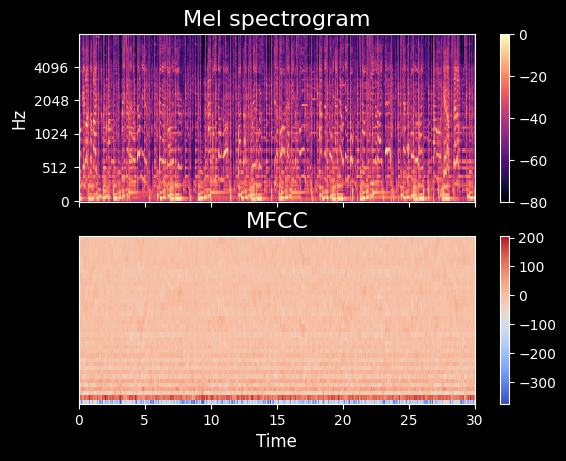

In [492]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmax=8000, ax=ax[0])

fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

### Compare different DCT bases

This code compares different Discrete Cosine Transform (DCT) bases for Mel-frequency cepstral coefficients (MFCCs).

The code computes MFCCs using two different DCT bases: RASTAMAT/Auditory toolbox (dct_type=2) and HTK-style (dct_type=3). These are two common types of DCT bases used in audio processing and feature extraction.

The first subplot (top row) displays the MFCC matrix computed with the RASTAMAT/Auditory toolbox DCT base. The `librosa.display.specshow()` function is used to visualize the MFCC matrix as a spectrogram-like plot. The x-axis represents time, and the y-axis represents the MFCC coefficients.

The second subplot (bottom row) displays the MFCC matrix computed with the HTK-style DCT base. Again, the `librosa.display.specshow()` function is used to visualize the MFCC matrix.

Color bars are added to each subplot using the `fig.colorbar()` function. The colorbar represents the magnitude or intensity of the MFCC coefficients.

Overall, this code allows you to compare and visualize the differences in the MFCCs obtained using different DCT bases, providing insights into how different bases can affect the representation of audio features.

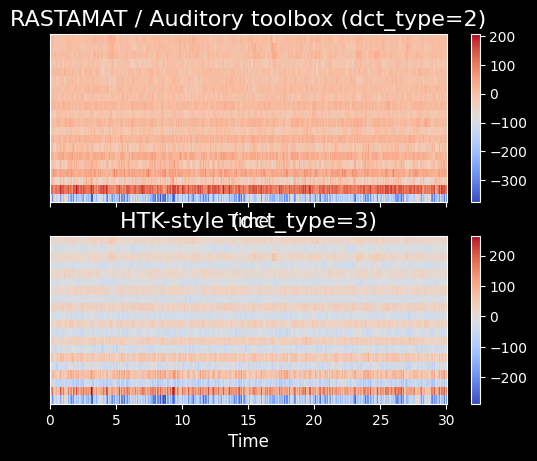

In [493]:
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])

ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])

ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])

## RMS

Root mean square is a feature that represents the overall energy of an audio signal. It is computed as the square root of the average of the squared amplitude values and can be used for audio level normalization and loudness measurement.

In [494]:
rms = librosa.feature.rms(y=y)
rms

array([[0.14934385, 0.18310189, 0.20822445, ..., 0.12179379, 0.09953798,
        0.03671429]], dtype=float32)

### From spectrogram input

This code calculates the Root Mean Square (RMS) energy of an audio signal. Here's how it works:

First, it computes the spectrogram of the audio signal y using the Short-Time Fourier Transform (STFT). The spectrogram shows how the frequency content of the audio signal changes over time.

The code then separates the spectrogram into two components: magnitude and phase, using the librosa.magphase function. The magnitude represents the intensity or amplitude of different frequencies at each time frame, while the phase contains information about the phase angles of the frequencies.

Finally, it calculates the RMS energy of the magnitude spectrogram using the librosa.feature.rms function. The RMS energy provides an indication of the overall loudness or energy level of the audio signal. It represents the average value of the magnitude spectrogram, giving insight into the signal's strength.

In summary, this code analyzes the energy distribution of an audio signal by calculating the RMS energy from its spectrogram.

In [495]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
rms

array([[0.08814883, 0.12813405, 0.13208683, ..., 0.08517262, 0.03396485,
        0.01917972]])


The first chart depicts the Root Mean Square (RMS) Energy of an audio signal over time. It is displayed on a logarithmic scale on the y-axis, indicating the energy level of the audio signal. The chart shows how the energy of the audio signal varies throughout the duration of the signal.

The second chart is a log-scaled Power Spectrogram of the audio signal. It visualizes the distribution of frequency content over time. The colors represent the magnitude of the power of different frequencies in the signal. The y-axis is logarithmic, representing a wide range of frequencies, while the x-axis represents time.

[Text(0.5, 1.0, 'log Power spectrogram')]

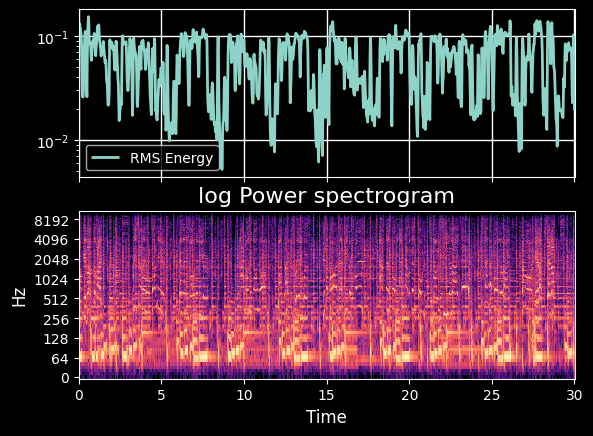

In [496]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)

ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

## Spectral Centroid

A feature that represents the center of mass of the spectral distribution of an audio signal. It is computed as the weighted mean of the frequency values and can be used for timbre analysis and music genre classification.

The spectral centroid represents the center of mass or average frequency of a signal's spectrum. It provides information about the spectral shape and distribution of energy across different frequencies. It is computed as the weighted mean of the frequency values and can be used for timbre analysis and music genre classification. Spectral centroid is commonly used for tasks such as:

- Timbre analysis: Spectral centroid can help differentiate between different instruments or sound sources based on their frequency content.

- Music genre classification: Spectral centroid can be used as a feature to distinguish between different music genres based on their characteristic spectral characteristics.

- Pitch detection: By tracking changes in spectral centroid over time, you can estimate the pitch of a sound.

In [497]:
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroid

array([[1726.51750914, 1643.02632624, 1626.67829798, ..., 1792.73410962,
        1483.51877982, 1453.24610931]])

### From spectrogram input

In [498]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)

array([[1726.51750914, 1643.02632624, 1626.67829798, ..., 1792.73410962,
        1483.51877982, 1453.24610931]])

### Using variable bin center frequencies

Using variable bin center frequencies when calculating the spectral centroid can be useful in certain situations where the frequency content of the audio signal is not evenly distributed.

The spectral centroid is a measure of the center of mass of the frequency distribution in a signal. It indicates where most of the energy or intensity of the signal is concentrated. By default, when calculating the spectral centroid, the frequency bins are assumed to have equal widths.

However, in some cases, the frequency content of the signal may not be evenly distributed. For example, certain sounds or musical instruments might have a higher concentration of energy in certain frequency ranges. In such cases, using variable bin center frequencies can provide a more accurate representation of the spectral centroid.

In this code, the `librosa.reassigned_spectrogram` function is used to calculate the reassigned spectrogram of the audio signal y. The reassigned spectrogram allows for variable bin center frequencies, as it takes into account the instantaneous frequency information of the signal.

By passing `np.abs(D)` (absolute value of the reassigned spectrogram) and `freqs` (variable bin center frequencies) to librosa.feature.spectral_centroid, the spectral centroid is calculated using these variable bin center frequencies. This can provide more precise information about the center of mass of the frequency distribution in the audio signal, especially when the frequency content is not evenly distributed.

In [499]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

array([[1726.5245809 , 1642.95689727, 1626.70203767, ..., 1792.6909228 ,
        1482.96150927, 1453.16582861]])

In [500]:
spectral_centroid.T # Transpose

array([[1726.51750914],
       [1643.02632624],
       [1626.67829798],
       ...,
       [1792.73410962],
       [1483.51877982],
       [1453.24610931]])

 This code snippet allows you to visualize the log power spectrogram of the audio signal and see how the spectral centroid varies over time, indicating the center of mass of the frequency distribution at each frame.

[Text(0.5, 1.0, 'log Power spectrogram')]

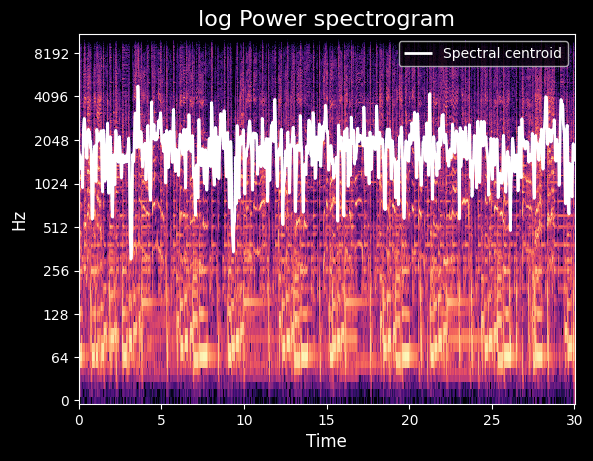

In [501]:
times = librosa.times_like(spectral_centroid)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(times, spectral_centroid.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Spectral Bandwidth

A feature that represents the width of the spectral distribution of an audio signal. It is computed as the second central moment of the frequency values and can be used for timbre analysis and music genre classification.

In the context of audio feature extraction, spectral bandwidth refers to a measure of the width or spread of the frequencies present in an audio signal. It provides information about the distribution of energy across the frequency spectrum.

Spectral bandwidth is typically computed using mathematical techniques such as the Fast Fourier Transform (FFT) or similar spectral analysis methods. It can be expressed in Hertz (Hz) or as a ratio relative to the center frequency.

Spectral bandwidth is useful for:

- Timbral Analysis: Spectral bandwidth provides information about the brightness or tonal quality of an audio signal. High spectral bandwidth indicates a wide distribution of energy across the frequency spectrum, suggesting a brighter or noisier sound, while low spectral bandwidth suggests a more focused or narrowband sound.

- Instrument Classification: Different musical instruments have characteristic frequency content and timbral qualities. By extracting spectral bandwidth, you can capture important information for distinguishing between instruments. For example, instruments like cymbals or tambourines have broader spectral bandwidths compared to flutes or clarinets.

- Sound Event Detection: Spectral bandwidth can be used as a feature for detecting specific sound events or environmental sounds. Certain events or sounds may have distinct frequency characteristics. By analyzing the spectral bandwidth over time, you can identify events such as glass breaking, car horns, or footsteps based on their unique spectral properties.

- Speech Processing: Spectral bandwidth can provide insights into speech characteristics. It can help differentiate between different speech sounds or distinguish between voiced and unvoiced sounds. For example, fricatives (like "s" or "f" sounds) tend to have higher spectral bandwidth compared to vowels.

By considering spectral bandwidth as an audio feature, you can capture and analyze the frequency distribution properties of an audio signal, which can be valuable for various audio analysis and processing tasks.

In [502]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw

array([[1977.8192295 , 1861.94008178, 1870.22883658, ..., 2086.51354529,
        1999.72302204, 2169.27571097]])

### From spectrogram input

In [503]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_bandwidth(S=S)

array([[1977.8192295 , 1861.94008178, 1870.22883658, ..., 2086.51354529,
        1999.72302204, 2169.27571097]])

### Using variable bin center frequencies

In [504]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

array([[1977.80740124, 1861.95758284, 1870.19670488, ..., 2086.53586445,
        2000.02362783, 2169.24015952]])

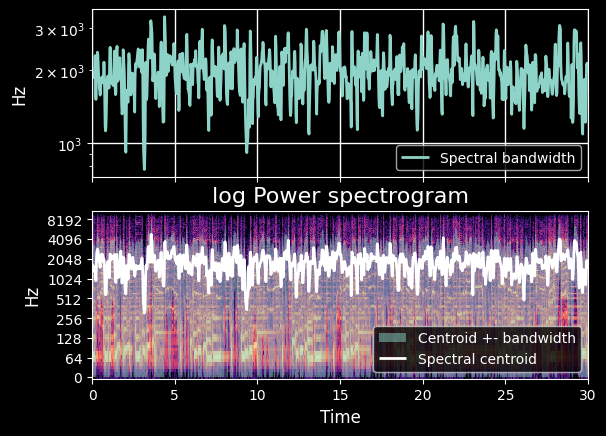

In [505]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

## Spectral_contrast

A feature that represents the difference in energy between adjacent frequency bands of an audio signal. It is computed by dividing the spectrum into sub-bands and computing the difference between the maximum and minimum energy values in each band. It can be used for music genre classification and speech recognition.

A frequency band refers to a specific range of frequencies within the audio spectrum. The audio spectrum is typically divided into multiple frequency bands to analyze different portions of the frequency range.

Spectral contrast is a feature that measures the difference in energy or intensity between different frequency bands. It helps to capture the perceptual contrast between regions of high and low spectral content in an audio signal. By calculating the spectral contrast across various frequency bands, you can obtain a representation of how the energy is distributed across the spectrum and identify prominent spectral features.

When extracting spectral contrast features, you usually divide the audio spectrum into multiple frequency bands, such as octaves or mel-frequency bands. Each band represents a specific range of frequencies, and the contrast between these bands is computed to capture the variations in spectral content. The number and width of the frequency bands depend on the specific application and analysis requirements.

By examining the spectral contrast across different frequency bands, audio analysis techniques can capture important information about the tonal characteristics, timbre, and overall texture of an audio signal. These features can be useful in various applications, including music genre classification, sound recognition, and audio effects processing.

The choice of frequency bands can be influenced by various factors, such as the characteristics of human auditory perception, the resolution needed for the analysis task, or established standards in audio processing. Common approaches include dividing the spectrum into equal-width bands (e.g., octaves or thirds of octaves) or using a mel-frequency scale, which approximates human perception of pitch.

By dividing the spectrum into frequency bands, audio analysis algorithms can examine the energy distribution and variations across different parts of the frequency range. This information can then be used to extract features that capture the tonal and timbral characteristics of the audio signal, such as spectral contrast or spectral centroid.

In [506]:
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
contrast

array([[ 8.88853968, 13.69364556, 30.71329471, ..., 28.38613519,
        24.61607221, 13.57765217],
       [14.88348477, 16.02269186, 17.37589777, ..., 19.94358027,
         9.46237466, 13.14322334],
       [23.79920312, 23.8246369 , 22.35827122, ...,  9.24095754,
        16.26513499, 15.93124165],
       ...,
       [15.5953782 , 12.63276321, 16.37623492, ..., 13.0106392 ,
        15.58817468, 15.31710101],
       [19.04058795, 16.93210851, 17.52108321, ..., 14.69660837,
        15.30093429, 15.53591523],
       [13.7712631 , 19.9278489 , 39.50321041, ..., 39.23450298,
        22.85842752, 13.7739401 ]])

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

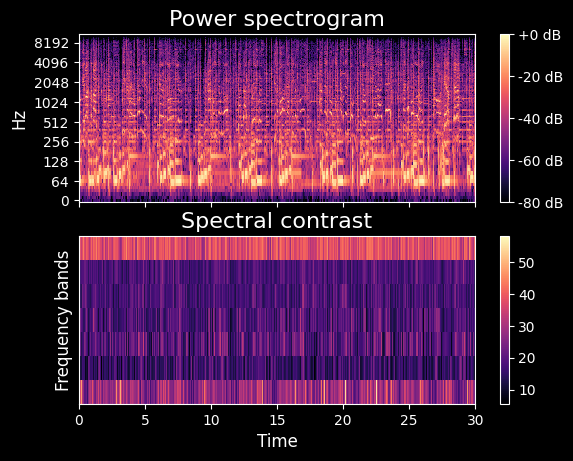

In [507]:
fig, ax = plt.subplots(nrows=2, sharex=True)

img1 = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log',
    x_axis='time',
    ax=ax[0]
)
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

## Spectral Flatness

A feature that represents the tonality of an audio signal. It is computed as the ratio between the geometric mean and the arithmetic mean of the power spectral density and can be used for music genre classification and instrument recognition.

In audio signal processing, spectral flatness is a measure that quantifies the "tonality" or "noisiness" of a signal. It provides information about the spectral shape of a signal's power spectrum.

The power spectrum of an audio signal represents the distribution of power across different frequency components. Spectral flatness measures how evenly or uniformly this power is distributed. It is calculated as the ratio of the geometric mean to the arithmetic mean of the power spectrum.

A perfectly flat spectrum (spectral flatness value close to 1) indicates that the signal has equal power across all frequency components, suggesting a noise-like or non-tonal character. On the other hand, a highly peaked spectrum (spectral flatness value close to 0) indicates a dominant tone or harmonic structure.

Spectral flatness can be useful in various audio processing applications:

1. Timbre analysis: Spectral flatness is often employed to analyze and characterize the timbre of audio signals. It helps distinguish between harmonic sounds (e.g., musical instruments) and noisy sounds (e.g., white noise, rain, etc.).

2. Audio classification: By examining the spectral flatness of audio segments, it is possible to differentiate between different types of audio signals. For example, it can be used to distinguish between speech, music, and environmental sounds.

3. Speech processing: Spectral flatness can provide insights into the quality of speech signals. It has been utilized in speech enhancement algorithms to discriminate between speech and noise components.

4. Audio coding: Spectral flatness can be used as a criterion for audio compression algorithms. It helps identify regions in the signal that are tonal or noise-like, which can influence the allocation of bit-rate resources for efficient coding.

Overall, spectral flatness is a valuable feature in audio signal analysis, offering information about the spectral characteristics of a signal and finding applications in various fields, such as music processing, speech recognition, and audio coding.

In [508]:
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[0.01143189, 0.00438773, 0.00141369, ..., 0.00271678, 0.00210237,
        0.00547747]], dtype=float32)

From spectrogram input

In [509]:
S, phase = librosa.magphase(librosa.stft(y))

librosa.feature.spectral_flatness(S=S)

array([[0.01143189, 0.00438773, 0.00141369, ..., 0.00271678, 0.00210237,
        0.00547747]], dtype=float32)

From power spectrogram input

In [510]:
S, phase = librosa.magphase(librosa.stft(y))
S_power = S ** 2
librosa.feature.spectral_flatness(S=S_power, power=1.0)

array([[0.01143189, 0.00438773, 0.00141369, ..., 0.00271678, 0.00210237,
        0.00547747]], dtype=float32)

## Spectral Rolloff

A feature that represents the frequency below which a certain percentage of the spectral energy of an audio signal is contained. It is computed as the frequency at which the cumulative sum of the spectral energy reaches a certain threshold and can be used for speech recognition and music genre classification.

Spectral rolloff provides information about the shape of the frequency spectrum of an audio signal and can be used to characterize the brightness or tonal content of the sound.

Spectral rolloff is defined as the frequency below which a certain percentage of the total energy of the spectrum is contained. Typically, the rolloff point is set at a percentage value between 85% and 99%. For example, if the rolloff point is set at 85%, the spectral rolloff frequency is the point below which 85% of the total spectral energy is located.

The spectral rolloff is calculated by sorting the magnitudes of the frequency spectrum in descending order and summing them until the cumulative energy reaches the desired percentage. The frequency corresponding to this point is considered the spectral rolloff frequency.

Spectral rolloff is useful in several audio processing applications:

Audio classification: Spectral rolloff can be used as a feature for classifying audio signals into different categories, such as speech, music, or noise. The rolloff frequency tends to be higher for sounds with more high-frequency content, like speech and music, and lower for noise signals.

Music information retrieval: Spectral rolloff is used to extract information about the tonal content or brightness of music signals. It can be used in tasks such as genre classification, mood estimation, or instrument recognition.

Audio effects and processing: Spectral rolloff can be used as a control parameter for audio effects and processing algorithms. For example, it can be used to adjust the cutoff frequency of a low-pass filter based on the brightness of the input signal.

Audio quality assessment: Spectral rolloff can be used as a metric for assessing the quality of audio signals. Changes in the rolloff frequency can indicate alterations in the spectral content of the signal, which may be useful for evaluating audio codecs or detecting audio degradation.

In summary, spectral rolloff is a useful audio feature that provides information about the shape of the frequency spectrum and can be used in various applications, including audio classification, music analysis, audio effects, and quality assessment.

### From time-series input

In [519]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff

array([[3811.37695312, 3552.97851562, 3563.74511719, ..., 3929.80957031,
        3326.87988281, 3197.68066406]])

In [520]:
rolloff_max = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_max

array([[8613.28125   , 8268.75      , 8322.58300781, ..., 8376.41601562,
        8257.98339844, 9410.00976562]])

In [521]:
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
rolloff_min

array([[21.53320312, 43.06640625, 53.83300781, ..., 43.06640625,
        32.29980469, 10.76660156]])

### From spectrogram input

In [517]:
S, phase = librosa.magphase(librosa.stft(y))
librosa.feature.spectral_rolloff(S=S, sr=sr)

array([[3811.37695312, 3552.97851562, 3563.74511719, ..., 3929.80957031,
        3326.87988281, 3197.68066406]])

[Text(0.5, 1.0, 'log Power spectrogram')]

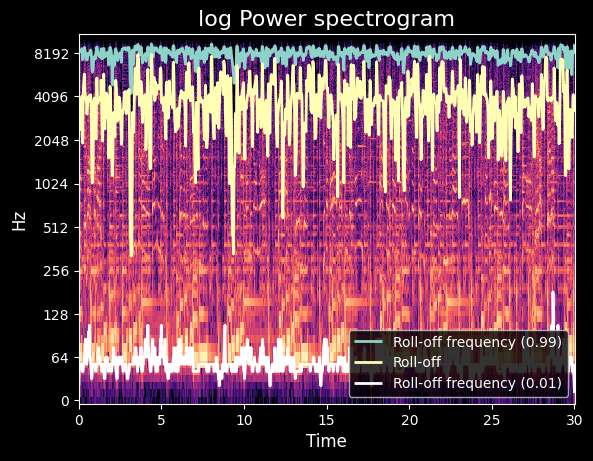

In [523]:
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff_max[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w', label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

## Poly Features

A feature that represents the coefficients of a polynomial fit to the magnitude spectrum of an audio signal. It is computed using linear regression and can be used for speech recognition and music genre classification.

Poly features, also known as polynomial features, refer to a set of features derived from polynomial transformations of the original audio features.

Audio signals are typically represented by time-domain waveforms or frequency-domain representations such as spectrograms or mel-frequency cepstral coefficients (MFCCs). However, these representations may not capture all the relevant information for certain audio analysis tasks. Poly features provide an additional way to represent the audio data by introducing higher-order interactions between the existing features.

Polynomial features are generated by applying polynomial transformations to the original audio features. The most common polynomial transformation used is the quadratic (second-order) transformation, where each pair of features is multiplied together to create new features. For example, if you have two original features A and B, the quadratic transformation would generate additional features A^2, B^2, and A * B.

The purpose of using poly features is to capture non-linear relationships and interactions between the original features. This can be useful in audio analysis tasks such as speech recognition, music genre classification, or sound event detection, where the relationships between different audio characteristics may not be linear. By incorporating poly features, the model can potentially learn more complex patterns and improve its performance in capturing the underlying structure of the audio data.

However, it's important to note that the effectiveness of poly features depends on the specific audio analysis task and the characteristics of the dataset. In some cases, linear features or other feature representations may be more appropriate. It's always recommended to experiment with different feature extraction techniques and evaluate their impact on the task at hand.

In [533]:
S = np.abs(librosa.stft(y))
S, S.shape

(array([[5.0869141e+00, 3.1434619e+00, 7.0562117e-02, ..., 9.7077101e-02,
         9.9867411e-02, 1.2234913e+00],
        [5.4145083e+00, 3.5955024e+00, 5.8692610e-01, ..., 7.1559238e-01,
         3.1180710e-01, 1.5245588e+00],
        [6.8823919e+00, 4.7584019e+00, 1.7920481e+00, ..., 7.7272093e-01,
         7.5365281e-01, 2.1667640e+00],
        ...,
        [3.4161456e-02, 1.6995486e-02, 1.7390719e-04, ..., 4.7799971e-04,
         2.1731318e-03, 1.4620483e-02],
        [3.4174219e-02, 1.6935054e-02, 2.1231511e-04, ..., 5.8296653e-05,
         2.1007822e-03, 1.4592391e-02],
        [3.4151286e-02, 1.6931333e-02, 1.9064372e-04, ..., 6.4109707e-05,
         1.6849443e-03, 1.4210389e-02]], dtype=float32),
 (1025, 1293))

Fit a degree-0 polynomial (constant) to each frame

In [534]:
p0 = librosa.feature.poly_features(S=S, order=0)
p0, p0.shape

(array([[1.57510802, 1.79622836, 1.51856319, ..., 0.99407139, 0.34247619,
         0.2261127 ]]),
 (1, 1293))

Fit a linear polynomial to each frame

In [535]:
p1 = librosa.feature.poly_features(S=S, order=1)
p1, p1.shape

(array([[-5.87578083e-04, -6.84841535e-04, -5.81423235e-04, ...,
         -3.64342495e-04, -1.35957219e-04, -9.04373481e-05],
        [ 4.81413220e+00,  5.57141732e+00,  4.72365877e+00, ...,
          3.00250940e+00,  1.09194036e+00,  7.24648582e-01]]),
 (2, 1293))

Fit a quadratic to each frame

In [536]:
p2 = librosa.feature.poly_features(S=S, order=2)
p2, p2.shape

(array([[ 1.54763466e-07,  1.80723411e-07,  1.55693335e-07, ...,
          9.70069157e-08,  4.19050712e-08,  3.02784867e-08],
        [-2.29384530e-03, -2.67731714e-03, -2.29794225e-03, ...,
         -1.43384374e-03, -5.97960629e-04, -4.24257664e-04],
        [ 7.94633642e+00,  9.22901588e+00,  7.87468228e+00, ...,
          4.96579879e+00,  1.94004259e+00,  1.33744439e+00]]),
 (3, 1293))

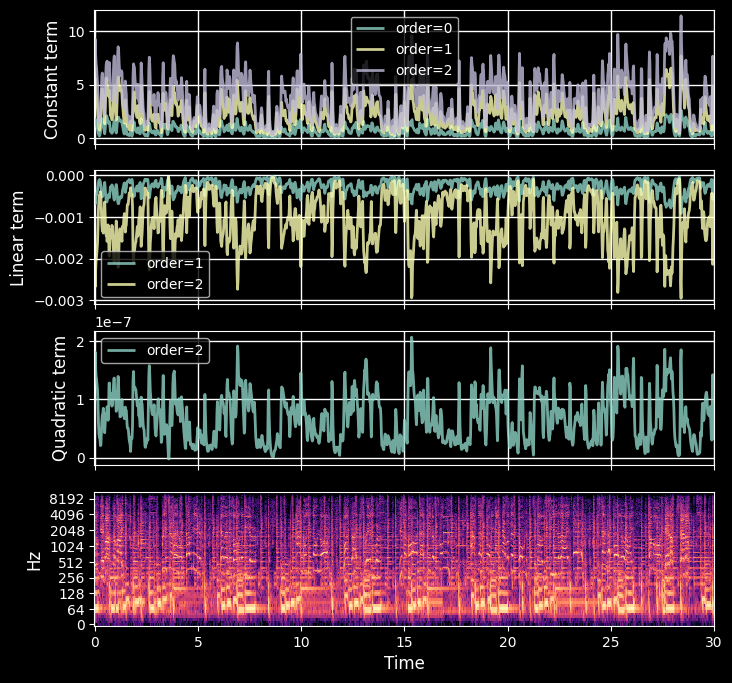

In [528]:
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)

ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)

ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')

ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()

ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[3])

## Tonnetz

A feature that represents the harmonic relationships between pitch classes in an audio signal. It is computed using a graph-based representation and can be used for music analysis and chord recognition.